## Preprocessing of the Dataset
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [1]:
!conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
from p_decision_tree.DecisionTree import DecisionTree
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import seaborn as sns
import warnings
from matplotlib import rcParams # figure size
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn import metrics as metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from string import ascii_lowercase
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
warnings.filterwarnings('ignore')

In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
#import the Dataset we set the index as the ID values
dataset = pd.read_csv("dataset.csv", index_col=0)
print('\033[1m' + "OG Dataset first two rows: \n" + '\033[0m')
print(dataset.head(2))
print('\n')
sampled_data = dataset.sample(frac=0.9, random_state = 425182)
#export the sampled_data as csv
sampled_data.to_csv('sampled_data.csv', index = True)
print('\033[1m' + "Sampled Dataset first 4 rows and Type: \n" + '\033[0m')
print(sampled_data.head())
print('\n')
print(type(sampled_data))

OG Dataset first two rows: 

    SurfaceR  NumberR TypeR  VegetationR Surroundings1 Surroundings2  \
ID                                                                     
1        600        1     a            4             e             b   
2        700        1     d            1             h             e   

   Surroundings3  UseR  FishingR  AcessR  ...  BuildingR  PollutionR   ShoreR  \
ID                                        ...                                   
1              h     0         0      50  ...          0           0  natural   
2              h     3         1      75  ...          1           0  natural   

   Green frogs  Brown frogs  Common toad  Fire-bellied toad  Tree frog  \
ID                                                                       
1            0            0            0                  0          0   
2            0            1            1                  0          0   

    Common newt  Great crested newt  
ID                    

## Question 1 - Insights into the Data

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [5]:
new_sampled_data = sampled_data[sampled_data['SurfaceR'] < 50000]

   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

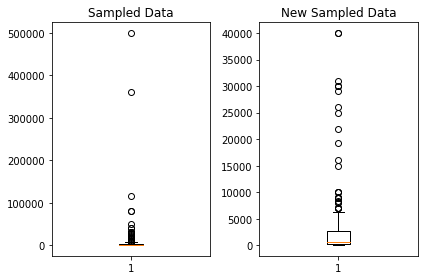

In [6]:
#boxplot to find the outliers from "SurfaceR" also comparing sampled_data and new_sampled_data
plt.subplot(1, 2, 1)
plt.boxplot(sampled_data['SurfaceR'])
plt.title('Sampled Data')

plt.subplot(1, 2, 2)
plt.boxplot(new_sampled_data['SurfaceR'])
plt.title('New Sampled Data')
plt.tight_layout()

plt.show()

In [7]:
#we first extract the SurfaceR column to remove the outliers
cleaned_data_S = new_sampled_data.loc[:, new_sampled_data.columns == 'SurfaceR']

low = .25 #first quartile
high = .75 #fourth quartile
quant_df = cleaned_data_S.quantile([low, high])

#remove outliers which lie in the first or fourth quartile
cleaned_data_S = cleaned_data_S.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

#create cleaned_data dataframe
cleaned_data = new_sampled_data
#drop the old SurfaceR column with the outliers and instead insert the one without outliers
cleaned_data = cleaned_data.drop('SurfaceR', 1)
cleaned_data['SurfaceR'] = cleaned_data_S
cleaned_data = cleaned_data.dropna()

print('\033[1m' + "cleaned_data with outlier removal for SurfaceR: \n" + '\033[0m')
print(cleaned_data.head())

cleaned_data with outlier removal for SurfaceR: 

     NumberR TypeR  VegetationR Surroundings1 Surroundings2 Surroundings3  \
ID                                                                          
38         1     d            1             e             b             h   
22         1     a            3             h             b             e   
7          1     d            0             e             e             h   
92         1     i            1             a             a             e   
171        2     a            3             b             e             a   

     UseR  FishingR  AcessR  RoadDistanceR  ...  PollutionR    ShoreR  \
ID                                          ...                         
38      1         0      75              2  ...           0   natural   
22      0         1     100              0  ...           0   natural   
7       1         2      25              0  ...           0  concrete   
92      0         0     100              2  .

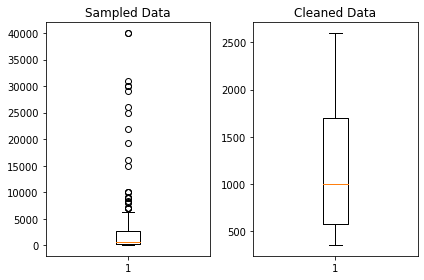

In [8]:
#visualization of the outlier removal
plt.subplot(1, 2, 1)
plt.boxplot(new_sampled_data['SurfaceR'])
plt.title('Sampled Data')

plt.subplot(1, 2, 2)
plt.boxplot(cleaned_data['SurfaceR'])
plt.title('Cleaned Data')
plt.tight_layout()

plt.show()

   (c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets.    Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

In [9]:
print("Summary statistics for new_sampled_data: \n")
print(new_sampled_data['SurfaceR'].describe())

print("\n") #Linebreak for better readability

print("Summary statistics for cleaned_data: \n")
print(cleaned_data['SurfaceR'].describe())

Summary statistics for new_sampled_data: 

count      164.000000
mean      3547.743902
std       7304.006408
min         30.000000
25%        300.000000
50%        600.000000
75%       2700.000000
max      40000.000000
Name: SurfaceR, dtype: float64


Summary statistics for cleaned_data: 

count      60.000000
mean     1169.166667
std       720.116026
min       350.000000
25%       575.000000
50%      1000.000000
75%      1700.000000
max      2600.000000
Name: SurfaceR, dtype: float64


Explanation: The difference in the statistics of both data sets come from the 111 (166-55=111) outliers beeing removed. That can be seen by the mean moving closer to the median (50% row) for the cleaned dataset. Also the standard deviation shrinked quite a bit from 7311.33 for the sampled data to 637.5 for the cleaned data. The last thing to point out are the changes in min and max values, which changed towards the median due to the cut.

### Basic Visualization
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

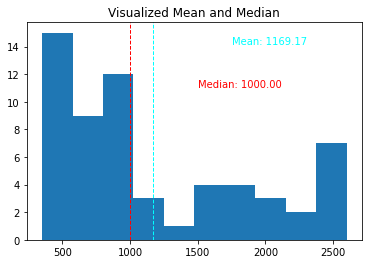

In [10]:
#compute mean and median for SurfaceR in cleaned data
cleanded_mean = np.mean(cleaned_data['SurfaceR'])
cleanded_median = np.median(cleaned_data['SurfaceR'])

fig, ax1 = plt.subplots()

ax1.set_title("Visualized Mean and Median")
ax1.hist(cleaned_data['SurfaceR'])

min_ylim, max_ylim = plt.ylim()
plt.axvline(cleanded_mean, color='cyan', linestyle='dashed', linewidth=1)
plt.text(cleanded_mean*1.5, max_ylim*0.9, 'Mean: {:.2f}'.format(cleanded_mean), color = "cyan")
plt.axvline(cleanded_median, color='red', linestyle='dashed', linewidth=1)
plt.text(cleanded_median*1.5, max_ylim*0.7, 'Median: {:.2f}'.format(cleanded_median), color = "red")


plt.show()

In [11]:
#we extract the unique values in Surroundings3
lowercase_list = cleaned_data['Surroundings3'].unique()

#Build a Dataframe in which we can clearly save the isolated mean/median for eaach unique value in Surroundings3
surroundings3_isolated = pd.DataFrame(index = lowercase_list)

list_mean = []
list_median = [] 

#Iterate over the unique values creating a temporary DataFrame for which we can compute mean and median
#and append to the corresponding list
for letter in lowercase_list:
    surroundings3_temp = cleaned_data[cleaned_data['Surroundings3']== letter]['SurfaceR']
    list_mean.append(surroundings3_temp.mean())
    list_median.append(surroundings3_temp.median())

surroundings3_isolated['Mean'] = list_mean
surroundings3_isolated['Median'] = list_median

print(surroundings3_isolated)
print('\n')
print("Surroundings3 for which the mean is maximal is: " + str(surroundings3_isolated['Mean'].idxmax()) 
      + ", with mean: " + str(surroundings3_isolated['Mean'].max()))
print('\n')
print("Surroundings3 for which the mean is minimal is: " + str(surroundings3_isolated['Mean'].idxmin()) 
      + ", with mean: " + str(surroundings3_isolated['Mean'].min()))
print('\n')
print("Surroundings3 for which the median is maximal is: " + str(surroundings3_isolated['Median'].idxmax()) 
      + ", with median: " + str(surroundings3_isolated['Median'].max()))
print('\n')
print("Surroundings3 for which the median is minimal is: " + str(surroundings3_isolated['Median'].idxmin()) 
      + ", with median: " + str(surroundings3_isolated['Median'].min()))

          Mean  Median
h   861.111111   600.0
e  1277.500000  1050.0
a  1180.000000  1000.0
g  1240.000000  1000.0
b  1350.000000  1650.0
f  1380.000000  1000.0
i  2000.000000  2000.0


Surroundings3 for which the mean is maximal is: i, with mean: 2000.0


Surroundings3 for which the mean is minimal is: h, with mean: 861.1111111111111


Surroundings3 for which the median is maximal is: i, with median: 2000.0


Surroundings3 for which the median is minimal is: h, with median: 600.0


Explanation: From the mean and median of "SurfaceR" in "cleaned_data" we see, that the distribution is farely symmetrical, but a bit scewed to the right due to some high values. When restrickting to specific Values of "Surroundings3" the median varies between 1175 and 650 and the mean varies between 1283.33 and 925.

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

Text(0.5, 1.0, 'SurfaceR in cleaned_data')

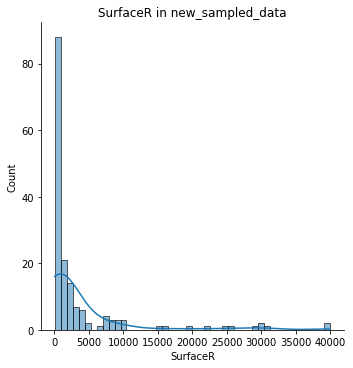

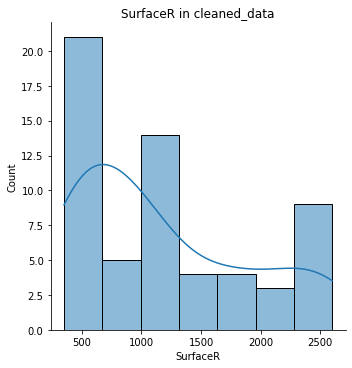

In [12]:
#Distribution can be seen from a barplot. We also set kernel density estimation to true
#KDE is aa non parametric way to estimate the pdf of a random variable giving us its distribution
n = 20
sns.displot(data=new_sampled_data, x='SurfaceR', kde=True); 
plt.title('SurfaceR in new_sampled_data')
sns.displot(data=cleaned_data, x='SurfaceR', kde=True); 
plt.title('SurfaceR in cleaned_data')

   (f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

<b>Solution for SurfaceR in Seaborn with Histogram and Rug Plot

Text(0.5, 1.0, 'SurfaceR ecdf plot in cleaned_data')

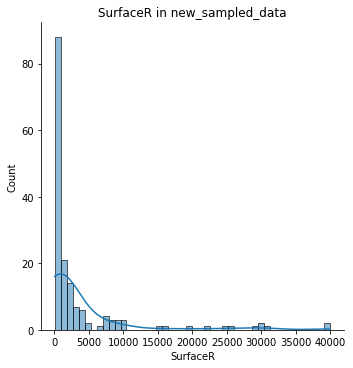

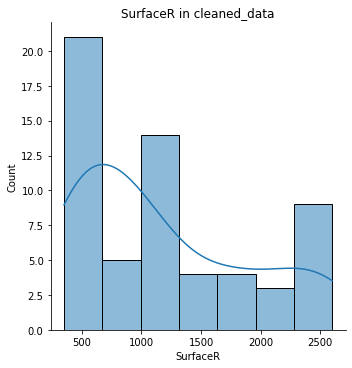

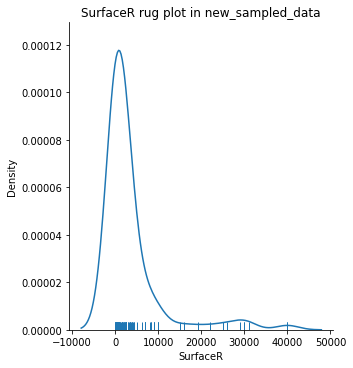

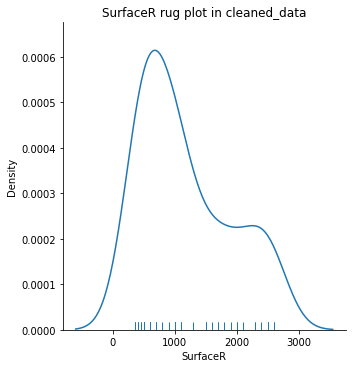

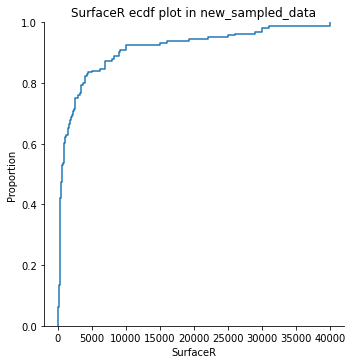

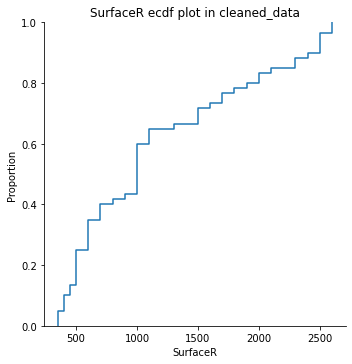

In [13]:
sns.displot(data=new_sampled_data, x='SurfaceR', kde=True); 
plt.title('SurfaceR in new_sampled_data')
sns.displot(data=cleaned_data, x='SurfaceR', kde=True); 
plt.title('SurfaceR in cleaned_data')
sns.displot(data=new_sampled_data, x='SurfaceR', kind='kde', rug=True);
plt.title('SurfaceR rug plot in new_sampled_data')
sns.displot(data=cleaned_data, x='SurfaceR', kind='kde', rug=True);
plt.title('SurfaceR rug plot in cleaned_data')
sns.displot(data=new_sampled_data, x='SurfaceR', kind="ecdf")
plt.title('SurfaceR ecdf plot in new_sampled_data')
sns.displot(data=cleaned_data, x='SurfaceR', kind="ecdf")
plt.title('SurfaceR ecdf plot in cleaned_data')

<b>Solution for AcessR in Seaborn with Histogram and Rug Plot

Text(0.5, 1.0, 'AcessR ecdf plot in cleaned_data')

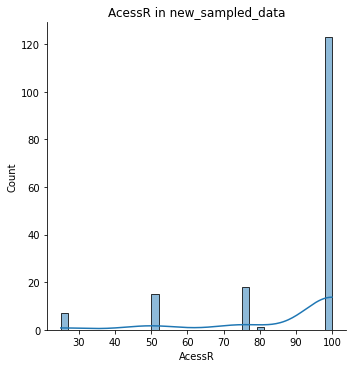

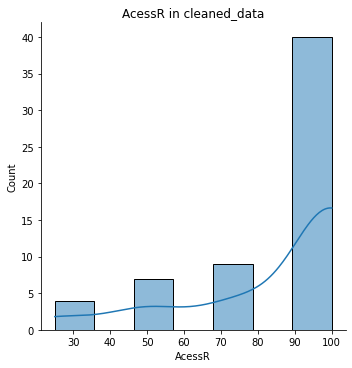

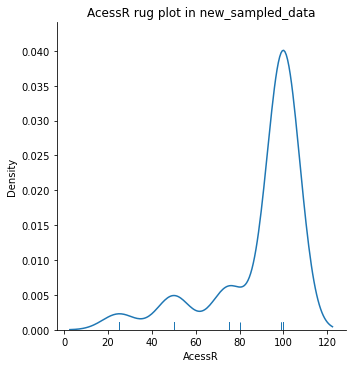

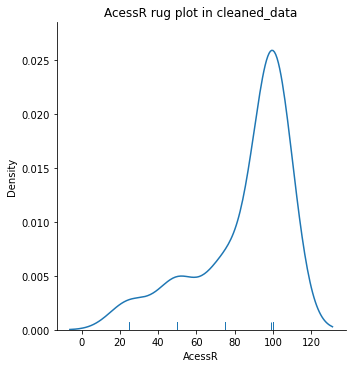

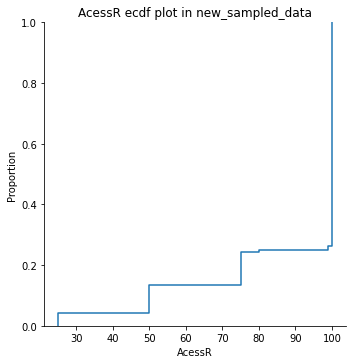

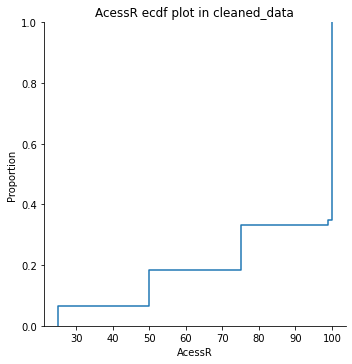

In [14]:
sns.displot(data=new_sampled_data, x='AcessR', kde=True); 
plt.title('AcessR in new_sampled_data')
sns.displot(data=cleaned_data, x='AcessR', kde=True); 
plt.title('AcessR in cleaned_data')
sns.displot(data=new_sampled_data, x='AcessR', kind='kde', rug=True);
plt.title('AcessR rug plot in new_sampled_data')
sns.displot(data=cleaned_data, x='AcessR', kind='kde', rug=True);
plt.title('AcessR rug plot in cleaned_data')
sns.displot(data=new_sampled_data, x='AcessR', kind="ecdf")
plt.title('AcessR ecdf plot in new_sampled_data')
sns.displot(data=cleaned_data, x='AcessR', kind="ecdf")
plt.title('AcessR ecdf plot in cleaned_data')

<b>Bivariate Distribution (Jointplot)</b><br>
If we should explore the dependency of AcessR and Surface R we need to take Joint Plots

Text(0.5, 1.0, 'Jointplot for Bivariate Distributions in cleaned_data (KDE)')

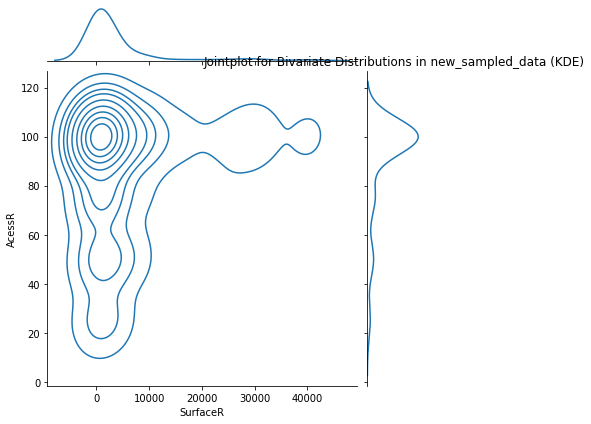

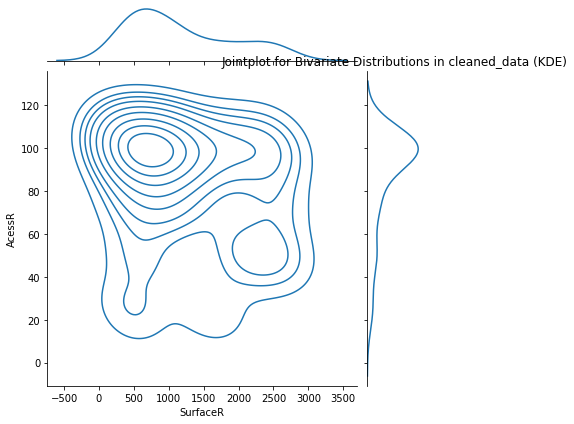

In [15]:
sns.jointplot(data=new_sampled_data, x="SurfaceR", y="AcessR", kind="kde");
plt.title('Jointplot for Bivariate Distributions in new_sampled_data (KDE)')
sns.jointplot(data=cleaned_data, x="SurfaceR", y="AcessR", kind="kde");
plt.title('Jointplot for Bivariate Distributions in cleaned_data (KDE)')

In [16]:
#calculate bin size for each item
L = (max(new_sampled_data['SurfaceR']) - min(new_sampled_data['SurfaceR']))/n
L2 = (max(cleaned_data['SurfaceR']) - min(cleaned_data['SurfaceR']))/n
L3 = (max(new_sampled_data['AcessR']) - min(new_sampled_data['AcessR']))/n
L4 = (max(cleaned_data['AcessR']) - min(cleaned_data['AcessR']))/n

#extract all bins with the ammount of entries from the histogram
nsd_surfacer = np.histogram(new_sampled_data['SurfaceR'], bins = n)[0]
cd_surfacer = np.histogram(cleaned_data['SurfaceR'], bins = n)[0]
nsd_acessr = np.histogram(new_sampled_data['AcessR'], bins = n)[0]
cd_acessr = np.histogram(cleaned_data['AcessR'], bins = n)[0]

#print out the values
#argmax selects the index of the larges bin (+1 since list starts at 0)
print('\033[1m' + "For new_sampled_data and a bin size of " + str(n) 
      + " the following bin in SurfaceR has the highest ammount of entries:\n" + '\033[0m')
print("Bin " + str(np.argmax(nsd_surfacer)+1) + " including values between [" 
      + str((np.argmax(nsd_surfacer)*L)) + "," + str(((np.argmax(nsd_surfacer)+1)*L)) + "] \n")

print('\033[1m' + "For cleaned_data and a bin size of " + str(n) 
      + " the following bin in SurfaceR has the highest ammount of entries:\n" + '\033[0m')
print("Bin " + str(np.argmax(cd_surfacer)+1) + " including values between [" 
      + str((np.argmax(cd_surfacer)*L2)) + "," + str(((np.argmax(cd_surfacer)+1)*L2)) + "] \n")

print('\033[1m' + "For new_sampled_data and a bin size of " + str(n) 
      + " the following bin in AcessR has the highest ammount of entries:\n" + '\033[0m')
print("Bin " + str(np.argmax(nsd_acessr)+1) + " including values between [" 
      + str((np.argmax(nsd_acessr)*L3)) + "," + str(((np.argmax(nsd_acessr)+1)*L3)) + "] \n")

print('\033[1m' + "For cleaned_data and a bin size of " + str(n) 
      + " the following bin in AcessR has the highest ammount of entries:\n" + '\033[0m')
print("Bin " + str(np.argmax(cd_acessr)+1) + " including values between [" 
      + str((np.argmax(cd_acessr)*L4)) + "," + str(((np.argmax(cd_acessr)+1)*L4)) + "] \n")


For new_sampled_data and a bin size of 20 the following bin in SurfaceR has the highest ammount of entries:

Bin 1 including values between [0.0,1998.5] 

For cleaned_data and a bin size of 20 the following bin in SurfaceR has the highest ammount of entries:

Bin 6 including values between [562.5,675.0] 

For new_sampled_data and a bin size of 20 the following bin in AcessR has the highest ammount of entries:

Bin 20 including values between [71.25,75.0] 

For cleaned_data and a bin size of 20 the following bin in AcessR has the highest ammount of entries:

Bin 20 including values between [71.25,75.0] 



Explanation: From the jointplots we again observe a reduction ouf outliers in the cleaned data set. This can best be seen from the erasure of the accumulation of SurfaceR between 2500 and 4000.

For both datasets, the highest frequency happens when AcessR=100 and SurfaceR=0.

## Question 2 - Decision Trees

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [17]:
#we use this dictonary to convert the summed up frogs number (number_frogs) into the corresponding word
num2words = {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', \
            6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine', 10: 'Ten', \
            11: 'Eleven', 12: 'Twelve', 13: 'Thirteen', 14: 'Fourteen', \
            15: 'Fifteen', 16: 'Sixteen', 17: 'Seventeen', 18: 'Eighteen', 19: 'Nineteen'}

In [18]:
pd.options.mode.chained_assignment = None #so we dont get a copy warning
new_sampled_data['number_frogs'] =  new_sampled_data.iloc[:, -8:].sum(axis=1).astype(int) # New column "number_frogs" crested by adding all the frog column data.
#we can see the newly added column with the frog types summed up
print(new_sampled_data.head(2))

    SurfaceR  NumberR TypeR  VegetationR Surroundings1 Surroundings2  \
ID                                                                     
86      9000        3     a            2             h             h   
26      4500        1     a            1             b             b   

   Surroundings3  UseR  FishingR  AcessR  ...  PollutionR   ShoreR  \
ID                                        ...                        
86             h     0         1     100  ...           0  natural   
26             g     3         2     100  ...           0  natural   

    Green frogs Brown frogs  Common toad  Fire-bellied toad  Tree frog  \
ID                                                                       
86            1           1            1                  0          1   
26            1           1            1                  0          1   

    Common newt  Great crested newt  number_frogs  
ID                                                 
86            0              

In [19]:
for num in range(len(new_sampled_data['number_frogs'])):
    new_sampled_data["number_frogs"].iloc[num]= str(num2words[new_sampled_data["number_frogs"].iloc[num]])
    # Integers converted to Alphabetical form  

   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

In [20]:
columns= new_sampled_data.columns

#copy over the necessary columns from new_sampled_data into a new descriptive_features dataframe
descriptive_features = columns[2:7]
target_features = columns[-1]

for column in columns:
    new_sampled_data[column]= new_sampled_data[column].astype(str)

data_descriptive = new_sampled_data[descriptive_features].values
data_label = new_sampled_data[target_features].values


print('\033[1m' + "descriptive features:" + '\033[0m')
print(descriptive_features.values)
print('\033[1m' + "\ntarget feature:" + '\033[0m')
print(target_features)

descriptive features:
['TypeR' 'VegetationR' 'Surroundings1' 'Surroundings2' 'Surroundings3']

target feature:
number_frogs


In [21]:
tree1 = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#id3(gain_threshold, minimum_samples)
tree1.id3(0,15)

#Error doesn't matter, still works

dot1 = tree1.print_visualTree(render=True)

try:
    dot1.render(filename='Tree1.dot')
except Exception:
    pass

print('\033[1m' + "Tree1 (min. number of samples: 15)" + '\033[0m')
print("System entropy: ", format(tree1.entropy))
print("System gini: ", format(tree1.gini))

Format: "pdf" not recognized. Use one of:
Format: "pdf" not recognized. Use one of:


You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
Tree1 (min. number of samples: 15)
System entropy:  2.778563407211305
System gini:  None


In [22]:
!dot -Tpng "Tree1.dot" -o "Tree1.png"

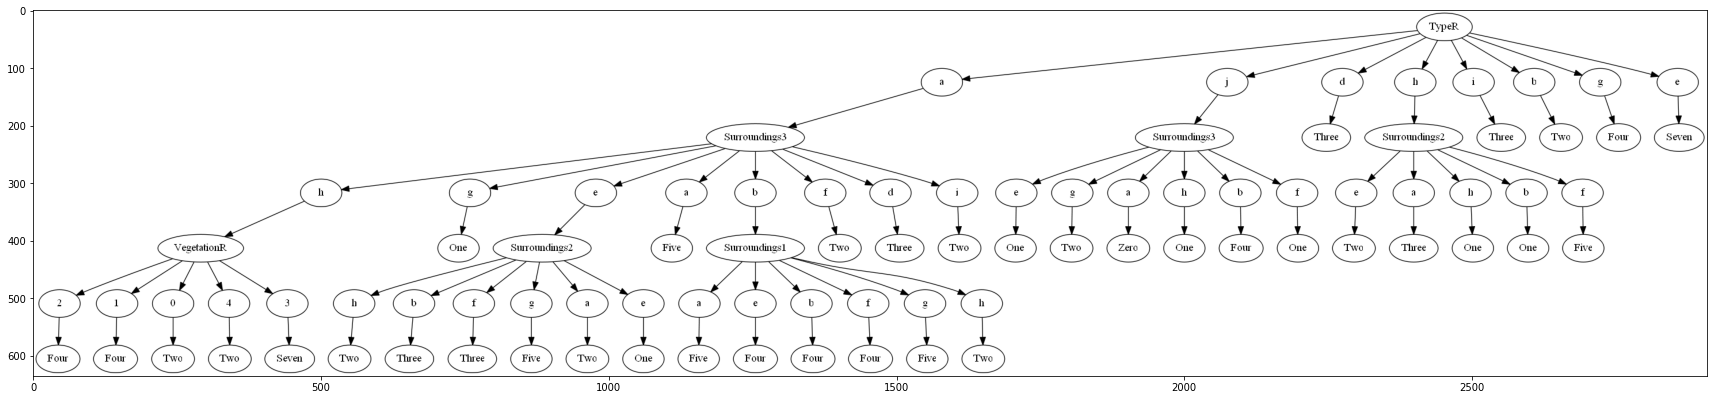

In [23]:
img = mpimg.imread('Tree1.png') 
plt.figure(figsize=(30, 20))
# Output Images 
plt.imshow(img)

#to build a second tree with p_decision_tree we need to delete the first one
del tree1, dot1

In [24]:
#Error doesn't matter, still works
tree2 = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#id3(gain_threshold, minimum_samples)
tree2.id3(0,1)

#Error doesn't matter, still works

dot2 = tree2.print_visualTree(render=True)

try:
    dot2.render(filename='Tree2.dot')
except Exception:
    pass

print('\033[1m' + "Tree2 (min. number of samples: 1)" + '\033[0m')
print("System entropy: ", format(tree2.entropy))
print("System gini: ", format(tree2.gini))

Format: "pdf" not recognized. Use one of:
Format: "pdf" not recognized. Use one of:


You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
Tree2 (min. number of samples: 1)
System entropy:  2.778563407211305
System gini:  None


In [25]:
!dot -Tpng "Tree2.dot" -o "Tree2.png"

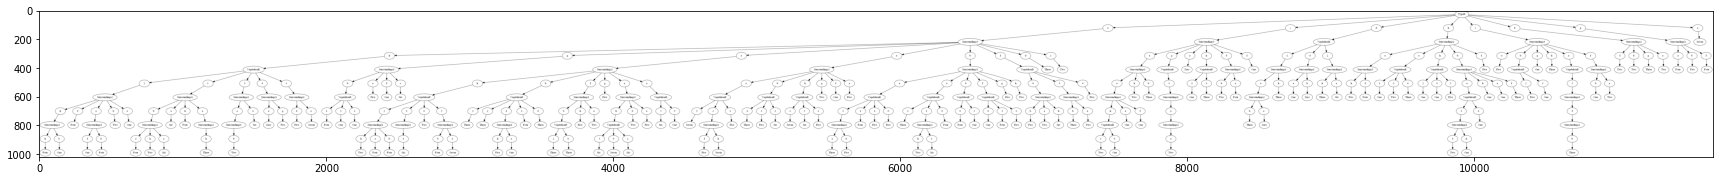

In [26]:
img = mpimg.imread('Tree2.png') 
plt.figure(figsize=(30, 20))
# Output Images 
plt.imshow(img)

   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

Explanation: 

In the first round we have chosen <b>TypeR</b> as the attribute to do our first split on.<br>
For TypeR = j the second Round in ID3 chooses Surroundings3 as an attribute.<br>
For TypeR = i the second Round in ID3 clossifies the number of frogs directly (One).<br>
For TypeR = h the second Round in ID3 chooses Surroundings2 as an attribute.<br>
For TypeR = a the second Round in ID3 chooses Surroundings1 as an attribute.<br>
For TypeR = g the second Round in ID3 clossifies the number of frogs directly (Two).<br>
For TypeR = d the second Round in ID3 clossifies the number of frogs directly (Three).<br>
For TypeR = b the second Round in ID3 clossifies the number of frogs directly (Two).<br>
For TypeR = e the second Round in ID3 clossifies the number of frogs directly (Seven).<br>

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

Explanation:<br> Tree2 is much more in danger of overfitting, because it takes a lot more leaves and complexity. Looking at it Tree1 looks like an adequate fit for the data, without to much complexity overwhelming the user.
For further analysis of over/underfitting methods like (post/pre) pruning.<br>
We could also create a set of trees as an ensemble to find a possibly better fit.

## Question 3 - Regression

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [27]:
restrict_dataset = sampled_data

restrict_dataset = restrict_dataset.drop(["NumberR", "Surroundings1", "Surroundings2",
                       "Surroundings3", "Common toad", "Fire-bellied toad", 
                       "Tree frog", "Common newt", "Great crested newt"], axis=1)

print(restrict_dataset.head(2))

    SurfaceR TypeR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  \
ID                                                                       
86      9000     a            2     0         1     100              9   
26      4500     a            1     3         2     100              9   

    BuildingR  PollutionR   ShoreR  Green frogs  Brown frogs  
ID                                                            
86          9           0  natural            1            1  
26          9           0  natural            1            1  


   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

All the numerical values are fit for a logistic regression. Columns consisting of either letters or categorical features need to be modified first. The approach is as follows:
Introduce a 0/1 feature for every possible value.
Binary values (true, false) can be translated to a single numeric value (0 or 1).
Categorical variables with a clear order (i.e., ordinal) can be translated to a single numeric value.
(e.g., excellent = 1.0, good = 0.7, average = 0.5, poor = 0.3, horrible = 0.0)
Categorical variables without a clear order can be put into dummy variables. Each category gets its own variable, which is 1 if the category is met and 0 if not.

Transform ShoreR to binary values and create categorical dummies for TypeR

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

In [28]:
#Can only be executed once after line 47!
print(restrict_dataset['ShoreR'].unique()) #we have natural and concrete

#we now encode natural -> 0 and concrete -> 1
restrict_dataset['ShoreR'] = restrict_dataset['ShoreR'].replace({'natural': 0, 'concrete': 1})

['natural' 'concrete']


In [29]:
#Can only be executed once after line 47!
#Transform TypeR
typer = pd.get_dummies(restrict_dataset.TypeR, prefix='TypeR')
restrict_dataset = restrict_dataset.join(typer)
restrict_dataset.drop(['TypeR'], axis=1, inplace=True)
print(restrict_dataset.head(2))

    SurfaceR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
ID                                                                            
86      9000            2     0         1     100              9          9   
26      4500            1     3         2     100              9          9   

    PollutionR  ShoreR  Green frogs  Brown frogs  TypeR_a  TypeR_b  TypeR_d  \
ID                                                                            
86           0       0            1            1        1        0        0   
26           0       0            1            1        1        0        0   

    TypeR_e  TypeR_g  TypeR_h  TypeR_i  TypeR_j  
ID                                               
86        0        0        0        0        0  
26        0        0        0        0        0  


Explanation: We left all the data untouched except for ShoreR, which we modified to have Values 0 and 1 for 'natural' and 'concrete' and TypeR, which we replaced by 8 dummy-variables.

(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

In [30]:
#first split into target variable and descriptive variable
#start with green frogs as target feature
target_f = restrict_dataset['Green frogs'].copy()
descriptive_f = restrict_dataset.drop((['Brown frogs', 'Green frogs']), axis=1)

<b>First Idea: Heat Map

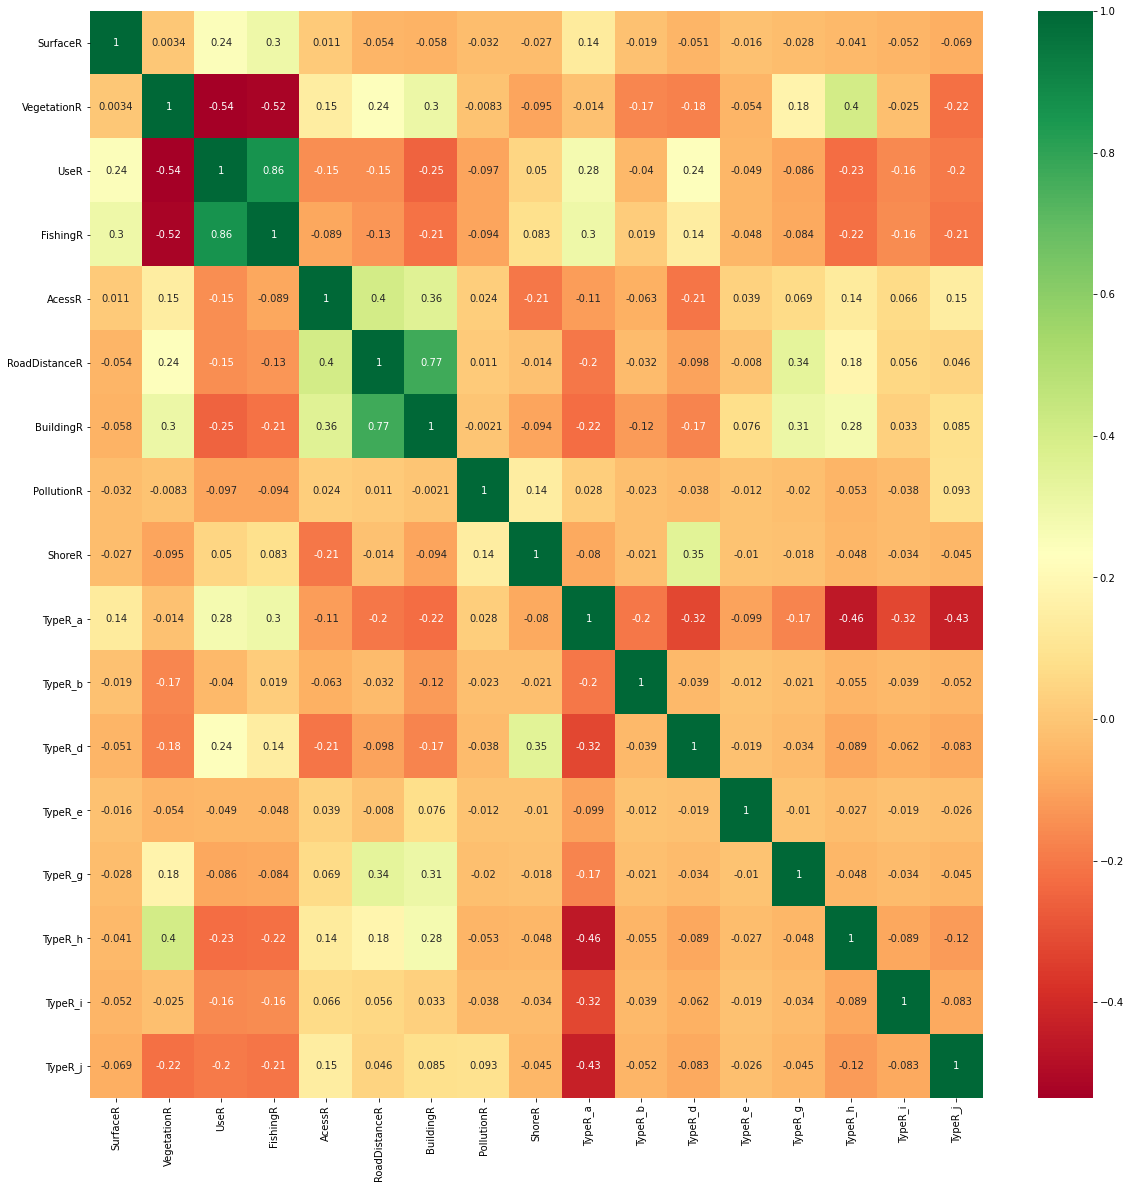

In [31]:
#get correlations of each features in dataset
corrmat = descriptive_f.corr() #on descriptive features
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(descriptive_f[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<b>Second Idea: Feature Importance

[0.22635008 0.12694911 0.05160077 0.06812903 0.06720964 0.12028482
 0.11758874 0.00897455 0.00688161 0.08125336 0.01325531 0.02647418
 0.00686627 0.00432712 0.02069775 0.01236781 0.04078985]


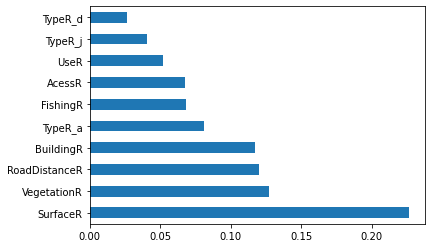

In [32]:
model = ExtraTreesClassifier()
model.fit(descriptive_f,target_f)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=descriptive_f.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<b>Third Idea: Univariate Selection

In [33]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(descriptive_f,target_f)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(descriptive_f.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


            Specs          Score
0        SurfaceR  987832.366765
2            UseR      31.216883
3        FishingR      28.795272
16        TypeR_j      11.900000
9         TypeR_a       9.535849
5   RoadDistanceR       6.057777
14        TypeR_h       5.822556
11        TypeR_d       3.430000
15        TypeR_i       1.462857
8          ShoreR       0.804762


<b>Now with the target feature Brown frogs

In [34]:
target_f = restrict_dataset['Brown frogs'].copy()

<b>Feature Importance

[0.24050959 0.13307343 0.04594864 0.05618116 0.08771104 0.14324365
 0.1248103  0.03331243 0.02101076 0.02563155 0.01745473 0.02776175
 0.00064072 0.00830571 0.01126948 0.01067238 0.01246267]


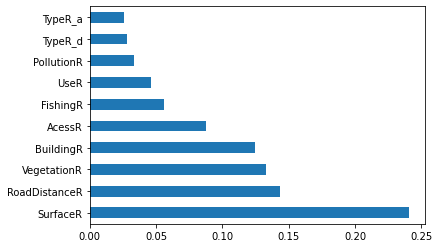

In [35]:
model = ExtraTreesClassifier()
model.fit(descriptive_f,target_f)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=descriptive_f.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<b>Univariate Selection

In [36]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(descriptive_f,target_f)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(descriptive_f.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
0        SurfaceR  131579.540796
4          AcessR      38.643002
7      PollutionR       5.721088
11        TypeR_d       5.291005
8          ShoreR       3.895944
15        TypeR_i       2.592593
10        TypeR_b       2.116402
6       BuildingR       1.538066
5   RoadDistanceR       1.251620
13        TypeR_g       0.298060


Explanation: We can see on the feature importance that SurfaceR, RoadDistanceR, VegetationR and BuildingR are by that method the most important features. The heatmap gives us a overview how two features correlate by computing it for every possible pair. Since we want to build a regression for preferrably corrolated features and use the regression line as a classifier (above/below the line). So we get the insights from the heatmap additional to feature importance. By those we decide on the features: <i>(BuildingR & RoadDistanceR) & (UseR & FishingR)</i>
We can also see by the computation, that this selection works out for Green and Brown Frogs similary.
<br>
Additionally we thought that we could also use <i>(BuildingR & RoadDistanceR) & (UseR & VegetationR)</i>. This comes from the point that in the pair (UseR & VegetationR) we have less correlation than with (UseR & FishingR), making the regression line not as reliable, but the feature VegetationR is higher up in the feature importance analysis. We think both options are justifiable choices and would need deeper analysis to find the best within them.

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

4 features choosen: (BuildingR & RoadDistanceR) & (UseR & FishingR)

<b>Start with Green Frogs

In [37]:
target_f = restrict_dataset['Green frogs'].copy()

In [38]:
#Drop all unnecessary freatures (only use once)
descriptive_f = descriptive_f.loc[:, descriptive_f.columns.intersection(['BuildingR' , 'RoadDistanceR','UseR' , 'FishingR'])]

In [39]:
#split in training and test data for target and descriptive features
#We have choosen 15% of the data being test data, since we don't have that much data to train on
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(descriptive_f, target_f, test_size=0.15, random_state=42)

In [40]:
model = LogisticRegression()
model.fit(X_train_g, y_train_g)

LogisticRegression()

In [41]:
y_pred_g = pd.Series(model.predict(X_test_g))
y_test_g = y_test_g.reset_index(drop=True)
z = pd.concat([y_test_g, y_pred_g], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,1
1,1,0
2,0,0
3,0,1
4,1,1


In [42]:
print("Accuracy (Green Frogs):", metric.accuracy_score(y_test_g, y_pred_g))
print("Precision (Green Frogs):", metric.precision_score(y_test_g, y_pred_g))
print("Recall (Green Frogs):", metric.recall_score(y_test_g, y_pred_g))

Accuracy (Green Frogs): 0.6153846153846154
Precision (Green Frogs): 0.6923076923076923
Recall (Green Frogs): 0.6


<b>Brown Frogs Regression:

In [43]:
target_f = restrict_dataset['Brown frogs'].copy()
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(descriptive_f, target_f, test_size=0.15, random_state=42)
model = LogisticRegression()
model.fit(X_train_b, y_train_b)
y_pred_b = pd.Series(model.predict(X_test_b))
y_test_b = y_test_b.reset_index(drop=True)
z = pd.concat([y_test_b, y_pred_b], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1


In [44]:
print("Accuracy (Brown Frogs):", metric.accuracy_score(y_test_b, y_pred_b))
print("Precision (Brown Frogs):", metric.precision_score(y_test_b, y_pred_b))
print("Recall (Brown Frogs:)", metric.recall_score(y_test_b, y_pred_b))

Accuracy (Brown Frogs): 0.7692307692307693
Precision (Brown Frogs): 0.7692307692307693
Recall (Brown Frogs:) 1.0


   (e) For each of the two trained classifiers compute and print the confusion matrix.

Text(0.5, 1.1, 'Confusion matrix Green Frogs')

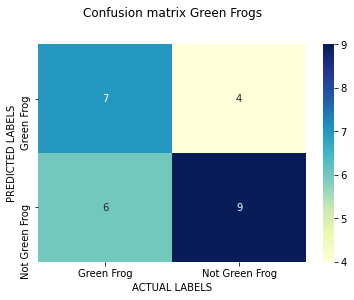

In [45]:
#get the confusion matrix
cnf_matrix = metric.confusion_matrix(y_test_g, y_pred_g)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# use sns.heatmap for nicer visualization of the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.set_xlabel('ACTUAL LABELS')
ax.set_ylabel('PREDICTED LABELS')
ax.xaxis.set_ticklabels(['Green Frog', 'Not Green Frog'])
ax.yaxis.set_ticklabels(['Green Frog', 'Not Green Frog'])
plt.title('Confusion matrix Green Frogs', y=1.1)


Text(0.5, 1.1, 'Confusion matrix Brown Frogs')

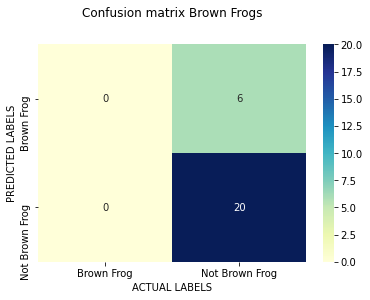

In [46]:
cnf_matrix = metric.confusion_matrix(y_test_b, y_pred_b)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# use sns.heatmap for nicer visualization of the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.set_xlabel('ACTUAL LABELS')
ax.set_ylabel('PREDICTED LABELS')
ax.xaxis.set_ticklabels(['Brown Frog', 'Not Brown Frog'])
ax.yaxis.set_ticklabels(['Brown Frog', 'Not Brown Frog'])
plt.title('Confusion matrix Brown Frogs', y=1.1)

(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

Explanation: <br>

Pulling from the accuracy, precision and recall calculations above, the accuracy and precision are higher for the prediction model for brown frogs. The problem comes with the recall value. The recall value for brown frogs is 1. Looking also at the confusion matrix, the model predicts that nothing is a brown Frog. This leads to good values for accuracy and precision, because those don't look for false-negative values. There are only 23% brown frogs in the data, so the model puts nothing into the brown frog category and gets an accuracy and precision of 77%. For the model of green frogs there is a more balanced picture. All three Values are between 0.45 and 0.67, which makes for a bad but balanced prediciton. To counter the Problems one could try to get a more balanced training set between brown frogs and not brown frogs, to make the false-negative case count more.

## Question 4 - Support Vector Machines

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

In [47]:
#we use the same restricted and one hot encoded dataset we used in Q3
print(restrict_dataset.head(2))

    SurfaceR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
ID                                                                            
86      9000            2     0         1     100              9          9   
26      4500            1     3         2     100              9          9   

    PollutionR  ShoreR  Green frogs  Brown frogs  TypeR_a  TypeR_b  TypeR_d  \
ID                                                                            
86           0       0            1            1        1        0        0   
26           0       0            1            1        1        0        0   

    TypeR_e  TypeR_g  TypeR_h  TypeR_i  TypeR_j  
ID                                               
86        0        0        0        0        0  
26        0        0        0        0        0  


   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

Explanation: Like for logistic regression the numerical descriptive features can stay as they are. Binary features are modified to 0 and 1, features with more categories are modified into a scale and features with more but unordered categories are separated into dummies.

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

In [48]:
descriptive_f = descriptive_f.loc[:, descriptive_f.columns.intersection(['BuildingR' , 'RoadDistanceR','UseR' , 'FishingR'])]

#Green Frogs
target_f = restrict_dataset['Green frogs'].copy()
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(descriptive_f, target_f, test_size=0.15, random_state=42)

#Brown Frogs
target_f = restrict_dataset['Brown frogs'].copy()
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(descriptive_f, target_f, test_size=0.15, random_state=42)

Explanation:<br> We use a random test/train split here since it is an industry standard for those types of training. Also we dont need to stratify the train/test data. For a dataset with over 150 rows a test size between 10-20% is adequate (as discussed in the lecture), so we decided on 15%.

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [49]:
#Green Frogs
classifier1 = SVC(C=1, kernel='linear', gamma = 'auto')
classifier2 = SVC(C=2, kernel='poly', gamma = 'auto')

classifier1.fit(X_train_g, y_train_g)
classifier2.fit(X_train_g, y_train_g)
predict_greenfrogs_c1 = classifier1.predict(descriptive_f)
predict_greenfrogs_c2 = classifier2.predict(descriptive_f)

#Brown Frogs
classifier3 = SVC(C=1, kernel='linear', gamma = 'auto')
classifier4 = SVC(C=2, kernel='poly', gamma = 'auto')

classifier3.fit(X_train_b, y_train_b)
classifier4.fit(X_train_b, y_train_b)

predict_brownfrogs_c3 = classifier3.predict(descriptive_f)
predict_brownfrogs_c4 = classifier4.predict(descriptive_f)

   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

In [50]:
print('\033[1m' + "Accuracy for Green Frogs \n" + '\033[0m')
y_pred1 = classifier1.predict(X_test_g)
print("Accuracy Classifier1 kernel= linear (Green Frogs):", round(accuracy_score(y_test_g, y_pred1)*100),'%')
y_pred2 = classifier2.predict(X_test_g)
print("Accuracy Classifier2 kernel= poly (Green Frogs):", round(accuracy_score(y_test_g, y_pred2)*100),'%')

print('\n')
target_f = restrict_dataset['Green frogs'].copy()
print('\033[1m' + "Classification Report for Green Frogs Classifier 1 & 2 \n" + '\033[0m')
print(classification_report(target_f, predict_greenfrogs_c1))
print('\n')
print(classification_report(target_f, predict_greenfrogs_c2))

print('\n')
print('\033[1m' + "Accuracy for Brown Frogs \n" + '\033[0m')
y_pred3 = classifier3.predict(X_test_b)
print("Accuracy Classifier3 kernel= linear (Green Frogs):", round(accuracy_score(y_test_b, y_pred1)*100),'%')
y_pred4 = classifier4.predict(X_test_b)
print("Accuracy Classifier4 kernel= poly (Green Frogs):", round(accuracy_score(y_test_b, y_pred2)*100),'%')

print('\n')
target_f = restrict_dataset['Brown frogs'].copy()
print('\033[1m' + "Classification Report for Brown Frogs Classifier 3 & 4 \n" + '\033[0m')
print(classification_report(target_f, predict_brownfrogs_c3))
print('\n')
print(classification_report(target_f, predict_brownfrogs_c4))

Accuracy for Green Frogs 

Accuracy Classifier1 kernel= linear (Green Frogs): 65 %
Accuracy Classifier2 kernel= poly (Green Frogs): 65 %


Classification Report for Green Frogs Classifier 1 & 2 

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        70
           1       0.74      0.65      0.69       100

    accuracy                           0.66       170
   macro avg       0.66      0.66      0.65       170
weighted avg       0.67      0.66      0.66       170



              precision    recall  f1-score   support

           0       0.54      0.86      0.66        70
           1       0.83      0.48      0.61       100

    accuracy                           0.64       170
   macro avg       0.68      0.67      0.63       170
weighted avg       0.71      0.64      0.63       170



Accuracy for Brown Frogs 

Accuracy Classifier3 kernel= linear (Green Frogs): 38 %
Accuracy Classifier4 kernel= poly (Green Frogs): 38 %


Classif

   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

Explanation:<br> In terms of accuracy there is no clear better choice between the linear or the polynomial approach. One thing to note is, that the linear approach for brown frogs has the same problem as in the regressions, where just no case was assigned to being "no brown frog" (precision, recall and f1-score are all 0). For that case, the polynomial approach was the first to find a case of something being no brown frog. So for brown frogs we would go with the polynomial kernel at first, even though this approach reaches a smaller accuracy at first. For green frogs the numbers are nearly the same for both approaches, so there is no better kernel. One could argue, that the linear approach is more consistent because all the values are around 2/3 and the polynomial approach seems to be generous with the category of green frogs (higher pecision than recall). So for green frogs there is no clear better.


## Question 5 - Neural Networks
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data..

Possible Values: Unique values of each categorical feature

In [51]:
sampled_data_input =  sampled_data.iloc[:, 0:14]

print(sampled_data_input.head())

     SurfaceR  NumberR TypeR  VegetationR Surroundings1 Surroundings2  \
ID                                                                      
86       9000        3     a            2             h             h   
26       4500        1     a            1             b             b   
141    360000       12     a            1             h             a   
109        50        1     a            2             h             h   
120       300        1     j            1             a             h   

    Surroundings3  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
ID                                                                    
86              h     0         1     100              9          9   
26              g     3         2     100              9          9   
141             f     3         4     100              1          1   
109             e     0         0     100              9          5   
120             e     0         0     100              5      

In [52]:
sampled_data_input=sampled_data_input.drop(columns =['SurfaceR', 'NumberR','AcessR','RoadDistanceR','BuildingR'],axis=1)

In [53]:
for col in sampled_data_input:
    print (col, sampled_data_input[col].unique(),'=', len(sampled_data_input[col].unique()))

TypeR ['a' 'j' 'd' 'h' 'i' 'b' 'g' 'e'] = 8
VegetationR [2 1 3 0 4] = 5
Surroundings1 ['h' 'b' 'a' 'e' 'f' 'g' 'c'] = 7
Surroundings2 ['h' 'b' 'a' 'e' 'f' 'g' 'i'] = 7
Surroundings3 ['h' 'g' 'f' 'e' 'a' 'b' 'd' 'i'] = 8
UseR [0 3 1] = 3
FishingR [1 2 4 0 3] = 5
PollutionR [0 2 1] = 3
ShoreR ['natural' 'concrete'] = 2


In [54]:
print("Number of possible input patterns for the categorical data: \n")
print(8*5*7*7*7*3*5*3*2)

Number of possible input patterns for the categorical data: 

1234800


Explanation:<br> The Number of possible input patterns for the categorical data is the product of all different categorical inputs. The categorical inputs on the other hands are the unique column realizations.

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

In [55]:
# the student should choose -> results differ
#NumberR and SurfaceR as non categorical and ShoreR as Categorical

NN_data = sampled_data.loc[:, sampled_data.columns == 'SurfaceR']
NN_data['NumberR'] = sampled_data['NumberR']
NN_data['ShoreR'] = sampled_data['ShoreR']
NN_data = pd.concat([NN_data, sampled_data.iloc[:, -7:]], axis= 1)
print(NN_data.head(2))

    SurfaceR  NumberR   ShoreR  Green frogs  Brown frogs  Common toad  \
ID                                                                      
86      9000        3  natural            1            1            1   
26      4500        1  natural            1            1            1   

    Fire-bellied toad  Tree frog  Common newt  Great crested newt  
ID                                                                 
86                  0          1            0                   0  
26                  0          1            0                   0  


   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

In [56]:
NN_data_encoded = sampled_data.loc[:, sampled_data.columns == 'SurfaceR']
NN_data_encoded['NumberR'] = sampled_data['NumberR']
#one hot encoding ShoreR
NN_data_encoded['ShoreR'] = sampled_data['ShoreR'].replace({'natural': 0, 'concrete': 1})
NN_data_encoded = pd.concat([NN_data_encoded, sampled_data.iloc[:, -7:]], axis= 1)
print(NN_data_encoded.head(2))

    SurfaceR  NumberR  ShoreR  Green frogs  Brown frogs  Common toad  \
ID                                                                     
86      9000        3       0            1            1            1   
26      4500        1       0            1            1            1   

    Fire-bellied toad  Tree frog  Common newt  Great crested newt  
ID                                                                 
86                  0          1            0                   0  
26                  0          1            0                   0  


Explanation:<br> only ShoreR needs one hot encoding because we cant use a string as an input here. It allows for a better representation of categorical data and neural networks can't work with categorical data directly, so those need to be one-hot-encoded. Since ShoreR only has two unique values natural and concrete we can convert it to a binary column with natural being 0 and concrete being 1. All the other variables are already 0 or 1 so there is no need to further encode them.

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [57]:
X_train_NN , X_test_NN, y_train_NN, y_test_NN = train_test_split(NN_data_encoded.iloc[:, 0:3], NN_data_encoded.iloc[:, -7:], test_size=0.1, random_state=42)

   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [58]:
# (linear activation function):
clf1 = MLPClassifier(activation = 'relu')
a = clf1.fit(X_train_NN,y_train_NN)
clf1.score(X_test_NN,y_test_NN)

y_pred_clf1= clf1.predict(X_test_NN)
accuracy=metric.accuracy_score(np.array(y_test_NN).flatten(), np.array(y_pred_clf1).flatten(), normalize=True)
print(accuracy)

0.5546218487394958


In [59]:
#  (non-linear activation function):
clf2 = MLPClassifier(activation = 'logistic')
a1 = clf2.fit(X_train_NN,y_train_NN)
clf2.score(X_test_NN,y_test_NN)

y_pred_clf2 = clf2.predict(X_test_NN)
accuracy=metric.accuracy_score(np.array(y_test_NN).flatten(), np.array(y_pred_clf2).flatten(), normalize=True)
print(accuracy)

0.7142857142857143


Explanation:<br> The Sigmoid function in logistic makes the diffrence since we use a categorical value, which from the lecture known perform bad with linear activation functions. It works better with the sigmoid function, because a close wrong estimation is not penalized as hard as a large wrong one, s.t. the model can better distinguishe between close calls and and full blown errors.

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [60]:
# code for 2 more NN
clf3 = MLPClassifier(activation = 'logistic', learning_rate= 'adaptive', alpha = 0.001)
a2 = clf3.fit(X_train_NN,y_train_NN)
clf3.score(X_test_NN,y_test_NN)

y_pred_clf3= clf3.predict(X_test_NN)
accuracy=metric.accuracy_score(np.array(y_test_NN).flatten(), np.array(y_pred_clf3).flatten(), normalize=True)
print(accuracy)

0.7142857142857143


In [61]:
clf4 = MLPClassifier(activation = 'tanh', learning_rate= 'adaptive', alpha = 0.0005, max_iter=400, solver = 'sgd')
a2 = clf4.fit(X_train_NN,y_train_NN)
clf4.score(X_test_NN,y_test_NN)

y_pred_clf4= clf4.predict(X_test_NN)
accuracy=metric.accuracy_score(np.array(y_test_NN).flatten(), np.array(y_pred_clf4).flatten(), normalize=True)
print(accuracy)

0.7058823529411765


Explanation:<br> Both times we used non-linear activation functions since we have already seen in (e) that those work better. Also we used an adaptive learning rate for both, adaptive’ keeps the learning rate constant  as long as training loss keeps decreasing if it doesn't the learning rate gets adjusted automatically.<br>

For clf3: We put alpha as 0.001 which is an L2 penalty parameter so we get a bit more penalty for wrong classification with this model compared to the sklearn standard default=0.0001<br>

For clf4: alpha as 0.0005 so also slightly larger than the default. Additionally we use a maximum number of iterations, which makes computation faster (probably wont hit it since convergence is reached faster). And we use stochastic gradient descent as a solver to visualize this in the lecture presented method. 

## Question 6 - Evaluation

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [62]:
#Select the Descriptive and Target Features from question 5
X = NN_data_encoded.iloc[:,0:3]
y = NN_data_encoded.iloc[:, -7:]

#calculate cross validation score and set splits in K-Fold to 3
cross_val_score(clf1, X, y, scoring='accuracy', cv=3)
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [63]:
#Drop the NA Values resulting due to folding
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()

print(X_train.head(3))

    SurfaceR  NumberR  ShoreR
ID                           
1      600.0      1.0     0.0
2      700.0      1.0     0.0
3      200.0      1.0     0.0


In [64]:
#We first use clf1 then clf2 from question 5 and train it on our newly through folding generated Train Data
a = clf1.fit(X_train,y_train)
b = clf2.fit(X_train,y_train)

#on the fittet model, now get the through our model predicted values on the training data
y_pred_clf1 = clf1.predict(X_train)
y_pred_clf2 = clf2.predict(X_train)

<li>Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [65]:
#get the multilabel confusion matrix on the training data
cm_a = multilabel_confusion_matrix(y_train, y_pred_clf1)
cm_b = multilabel_confusion_matrix(y_train, y_pred_clf2)


print('\033[1m' + "Multilabel Confusion Matrix for CLF1 (Prediction on Training Data): " + '\033[0m')
print(cm_a)
print("\n")
print('\033[1m' + "Multilabel Confusion Matrix for CLF2 (Prediction on Training Data): " + '\033[0m')
print(cm_b)

Multilabel Confusion Matrix for CLF1 (Prediction on Training Data): 
[[[43  2]
  [56  2]]

 [[ 0 28]
  [ 0 75]]

 [[ 0 32]
  [ 0 71]]

 [[74  0]
  [29  0]]

 [[ 0 63]
  [ 0 40]]

 [[ 3 69]
  [ 1 30]]

 [[10 78]
  [ 1 14]]]


Multilabel Confusion Matrix for CLF2 (Prediction on Training Data): 
[[[ 5 40]
  [ 6 52]]

 [[ 0 28]
  [ 0 75]]

 [[ 0 32]
  [ 0 71]]

 [[74  0]
  [29  0]]

 [[63  0]
  [40  0]]

 [[72  0]
  [31  0]]

 [[88  0]
  [15  0]]]


In [66]:
print('\033[1m' + "Confusion Matrix for CLF1 (Prediction on Training Data): " + '\033[0m')
print(cm_a[0]+cm_a[1]+cm_a[2]+cm_a[3]+cm_a[4]+cm_a[5]+cm_a[6])
print("\n")
print('\033[1m' + "Confusion Matrix for CLF2 (Prediction on Training Data): " + '\033[0m')
print(cm_b[0]+cm_b[1]+cm_b[2]+cm_b[3]+cm_b[4]+cm_b[5]+cm_b[6])

Confusion Matrix for CLF1 (Prediction on Training Data): 
[[130 272]
 [ 87 232]]


Confusion Matrix for CLF2 (Prediction on Training Data): 
[[302 100]
 [121 198]]


- Print the cell-by-cell summation of the confusion matrices on the test data.

In [67]:
y_pred_clf1 = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

In [68]:
cm_a = multilabel_confusion_matrix(y_test, y_pred_clf1)
cm_b = multilabel_confusion_matrix(y_test, y_pred_clf2)

print('\033[1m' + "Multilabel Confusion Matrix for CLF1 (Prediction on Test Data): " + '\033[0m')
print(cm_a)
print("\n")
print('\033[1m' + "Multilabel Confusion Matrix for CLF2 (Prediction on Test Data): " + '\033[0m')
print(cm_b)

Multilabel Confusion Matrix for CLF1 (Prediction on Test Data): 
[[[14  0]
  [35  0]]

 [[ 0  5]
  [ 0 44]]

 [[ 0 17]
  [ 0 32]]

 [[31  0]
  [18  0]]

 [[ 0 27]
  [ 0 22]]

 [[ 0 31]
  [ 0 18]]

 [[ 0 47]
  [ 0  2]]]


Multilabel Confusion Matrix for CLF2 (Prediction on Test Data): 
[[[ 0 14]
  [ 1 34]]

 [[ 0  5]
  [ 0 44]]

 [[ 0 17]
  [ 0 32]]

 [[31  0]
  [18  0]]

 [[27  0]
  [22  0]]

 [[31  0]
  [18  0]]

 [[47  0]
  [ 2  0]]]


In [69]:
print('\033[1m' + "Confusion Matrix for CLF1 (Prediction on Test Data): " + '\033[0m')
print(cm_a[0]+cm_a[1]+cm_a[2]+cm_a[3]+cm_a[4]+cm_a[5]+cm_a[6])
print("\n")
print('\033[1m' + "Confusion Matrix for CLF2 (Prediction on Test Data): " + '\033[0m')
print(cm_b[0]+cm_b[1]+cm_b[2]+cm_b[3]+cm_b[4]+cm_b[5]+cm_b[6])

Confusion Matrix for CLF1 (Prediction on Test Data): 
[[ 45 127]
 [ 53 118]]


Confusion Matrix for CLF2 (Prediction on Test Data): 
[[136  36]
 [ 61 110]]


- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

In [70]:
i = 1
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    X_train = X_train.dropna()
    y_train = y_train.dropna()
    X_test = X_test.dropna()
    y_test = y_test.dropna()
    
    a = clf1.fit(X_train,y_train)
    b = clf2.fit(X_train,y_train)
    
    y_pred_clf1 = clf1.predict(X_test)
    y_pred_clf2 = clf2.predict(X_test)
    
    print('\033[1m' + "Fold Number " + str(i) + '\033[0m')
    print('\n')
    print("Classification Report with precision, recall and f1-scores for CLF1 (Prediction on Test Data): ")
    print(classification_report(y_test, y_pred_clf1))
    print("Classification Report with precision, recall and f1-scores for CLF2 (Prediction on Test Data): ")
    print(classification_report(y_test, y_pred_clf2))
    
    print('\n')
    print("Accuracy on Test data CLF1: ")
    accuracy1=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_clf1).flatten(), normalize=True)
    print(accuracy1)
    print('\n')
    print("Accuracy on Test data CLF2: ")
    accuracy2=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred_clf2).flatten(), normalize=True)
    print(accuracy2)
    
    #we used the test data before, now we use training data
    y_pred_clf1 = clf1.predict(X_train)
    y_pred_clf2 = clf2.predict(X_train)
    
    print('\n')
    print("Accuracy on Training data CLF1: ")
    accuracy1=metric.accuracy_score(np.array(y_train).flatten(), np.array(y_pred_clf1).flatten(), normalize=True)
    print(accuracy1)
    print('\n')
    print("Accuracy on Training data CLF2: ")
    accuracy2=metric.accuracy_score(np.array(y_train).flatten(), np.array(y_pred_clf2).flatten(), normalize=True)
    print(accuracy2)
    print('\n')
    
    #number of Folds for display
    i = i+1


Fold Number 1


Classification Report with precision, recall and f1-scores for CLF1 (Prediction on Test Data): 
              precision    recall  f1-score   support

           0       0.41      1.00      0.58        21
           1       0.65      1.00      0.79        33
           2       0.61      1.00      0.76        31
           3       0.25      1.00      0.40        12
           4       0.31      0.94      0.47        16
           5       0.22      1.00      0.35        11
           6       0.23      0.60      0.33         5

   micro avg       0.40      0.98      0.57       129
   macro avg       0.38      0.93      0.53       129
weighted avg       0.47      0.98      0.62       129
 samples avg       0.40      0.94      0.54       129

Classification Report with precision, recall and f1-scores for CLF2 (Prediction on Test Data): 
              precision    recall  f1-score   support

           0       0.41      1.00      0.58        21
           1       0.65      1.0

- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [71]:
#see in last exercise in the loop

In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

Explanation:<br>
We already see looking at the accuracy score that clf2 constantly outperforms clf1. This shows that our explanation from Q5 (e) holds true even with regards to test/training data build by cross fold validation.

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

Explanation:<br>
Since the accuracy of test and training data is very similar for both model we can exclude overfitting for both of them. If overfitting would be a problem we would see a very high accuracy on the training data and a much worse performance on the test data. <br>
For clf2 we can see that the model only makes use of 3 categorys out of the 7 existing. With around 70% we get an ok performance but it is possible that due to that fact it suffers from underfitting.

## Question 7 - Clustering

(a) For this question, use the extracted data set you created in the preprocessing step (sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

In [72]:
restrict_dataset = sampled_data

restrict_dataset = restrict_dataset.drop(["SurfaceR", "NumberR", "TypeR", "Surroundings1", "Surroundings2",
                       "Surroundings3", "AcessR", "ShoreR", "Common toad", "Fire-bellied toad", 
                       "Tree frog", "Common newt", "Great crested newt", "Green frogs", "Brown frogs"], axis=1)

print(restrict_dataset.head(2))

    VegetationR  UseR  FishingR  RoadDistanceR  BuildingR  PollutionR
ID                                                                   
86            2     0         1              9          9           0
26            1     3         2              9          9           0


In [73]:
#first we need to normalize the dataset, s.t. it will work
restrict_dataset_scaled = normalize(restrict_dataset)
restrict_dataset_scaled = pd.DataFrame(restrict_dataset_scaled, columns=restrict_dataset.columns)
print(restrict_dataset_scaled.head())

   VegetationR      UseR  FishingR  RoadDistanceR  BuildingR  PollutionR
0     0.154765  0.000000  0.077382       0.696441   0.696441         0.0
1     0.075378  0.226134  0.150756       0.678401   0.678401         0.0
2     0.188982  0.566947  0.755929       0.188982   0.188982         0.0
3     0.190693  0.000000  0.000000       0.858116   0.476731         0.0
4     0.140028  0.000000  0.000000       0.700140   0.700140         0.0


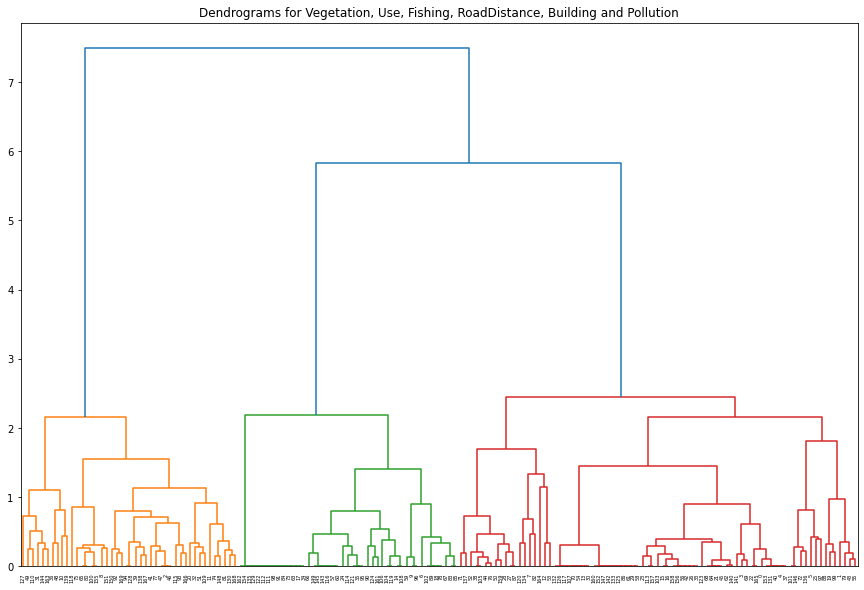

In [74]:
plt.figure(figsize=(15, 10))
plt.title("Dendrograms for Vegetation, Use, Fishing, RoadDistance, Building and Pollution")
dend = shc.dendrogram(shc.linkage(restrict_dataset_scaled, method='ward'))

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?

Explanation: The vertical axis of this dendrogram shows the distance between two clusters. So if two clusters are only connected though the highest line, their distance is 8. The horizontal axis is just a numeration of the different clusters.

(c) Split the diagram at 3 and find the number the clusters at this point.

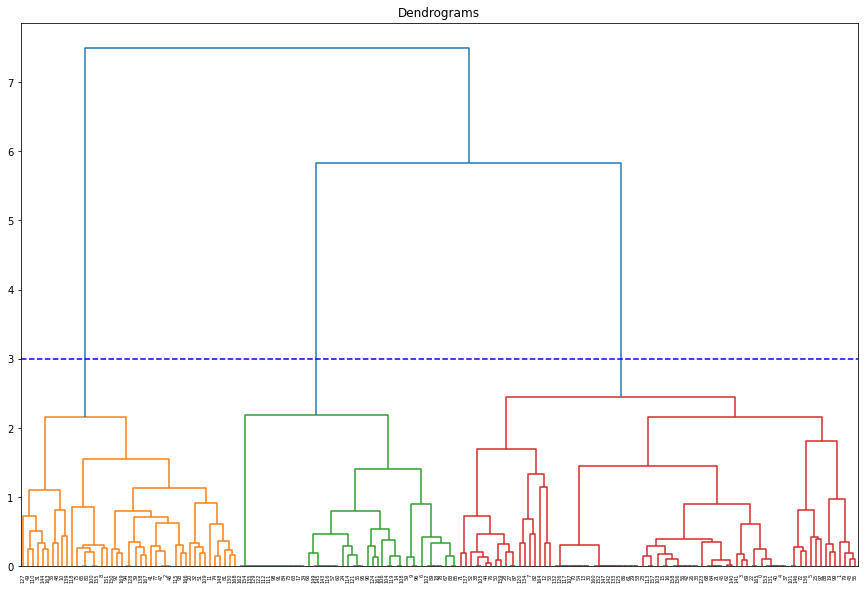

In [75]:
plt.figure(figsize=(15, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(restrict_dataset_scaled, method='ward'), color_threshold=3)
plt.axhline(y=3, color='b', linestyle='--')

plt.show()

Explanation: At the distance of three, there are three clusters left. That can be seen by the three lines, that cross the dotted line. We made it so that each of the three clusters has its own color.

(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

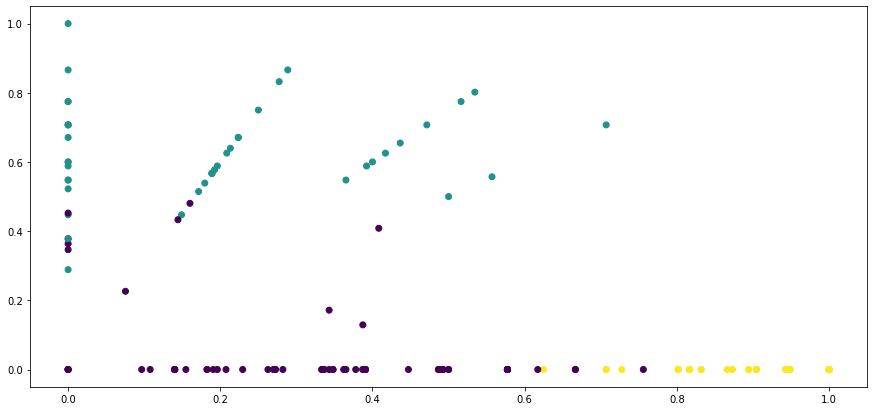

In [76]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(restrict_dataset_scaled)

plt.figure(figsize=(15, 7))
plt.scatter(restrict_dataset_scaled['VegetationR'], restrict_dataset_scaled['UseR'], c=cluster.labels_)

plt.show()

Explanation: We set the number of clusters to three because we found that ammount in the previous section.